In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 1. Loading and Cleaning Forest Cover Data

In [104]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("Data/Forest_and_Carbon.csv")

In [105]:
df = df.drop(columns=['Source', 'ISO2', 'ISO3','CTS_Full_Descriptor', 'CTS_Name', 'CTS_Code'])
df.head()

,ObjectId,Country,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,Advanced Economies,Carbon stocks in forests,Million tonnes,52618.6601,53177.699800,53393.568800,53609.438200,53825.307300,54041.176900,54257.046500,54472.91530,54755.427400,54931.224200,55107.021400,55282.818100,55458.615500,55634.412300,55562.628800,55727.584200,55892.539900,56057.495600,56222.450700,56445.550100,56668.648900,56891.748000,57114.846600,57337.946100,57568.174400,57777.849900,57959.762500,58035.051300,58102.552100,NaN,NaN
1,2,Advanced Economies,Forest area,1000 HA,945840.6089,950628.754500,950883.639900,951138.525500,951393.411100,951648.296500,951903.182100,952158.06750,953166.953100,953722.117000,954277.281100,954832.445100,955387.609200,955942.773200,953139.537200,953649.301300,954159.065300,954668.829400,955178.593400,956338.503600,957498.413800,958658.324000,959818.234200,960978.144400,962013.845500,961845.120000,961963.710000,962092.030000,962242.860000,962383.873400,962531.435600
2,3,Advanced Economies,Index of carbon stocks in forests,Index,100.0000,101.062436,101.472688,101.882941,102.293193,102.703446,103.113698,103.52395,104.060855,104.394951,104.729047,105.063143,105.397240,105.731336,105.594914,105.908406,106.221899,106.535392,106.848883,107.272876,107.696868,108.120860,108.544852,108.968845,109.406386,109.804867,110.150586,110.293670,110.421953,NaN,NaN
3,4,Advanced Economies,Index of forest extent,Index,100.0000,100.506232,100.533180,100.560128,100.587076,100.614024,100.640972,100.66792,100.774585,100.833281,100.891976,100.950671,101.009367,101.068062,100.771687,100.825582,100.879478,100.933373,100.987268,101.109901,101.232534,101.355167,101.477799,101.600432,101.709933,101.692094,101.704632,101.718199,101.734145,101.749054,101.764655
4,5,"Afghanistan, Islamic Rep. of",Forest area,1000 HA,1208.4400,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.44000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000,1208.440000


In [106]:
forest_areas = df[df["Indicator"] == "Forest area"]
forest_areas.head()

,ObjectId,Country,Indicator,Unit,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,2,Advanced Economies,Forest area,1000 HA,945840.6089,950628.7545,950883.6399,951138.5255,951393.4111,951648.2965,951903.1821,952158.0675,953166.9531,953722.1170,954277.2811,954832.4451,955387.6092,955942.7732,953139.5372,953649.3013,954159.0653,954668.8294,955178.5934,956338.5036,957498.4138,958658.3240,959818.2342,960978.1444,962013.8455,961845.1200,961963.710,962092.03,962242.86,962383.8734,962531.4356
4,5,"Afghanistan, Islamic Rep. of",Forest area,1000 HA,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.4400,1208.440,1208.44,1208.44,1208.4400,1208.4400
9,10,Africa,Forest area,1000 HA,685614.0711,702769.4832,699668.6553,696567.8275,693466.9996,690366.1717,687265.3438,684164.5159,681063.6880,677834.8392,674605.9904,671377.1416,668148.2928,664919.4440,661690.5952,658461.7464,655232.8976,652004.0488,648775.2000,645042.8380,668200.1500,664293.5400,660386.9300,656480.3200,652479.3843,648546.9900,644616.828,640606.55,636636.97,632640.2579,628661.6339
12,13,Albania,Forest area,1000 HA,784.9000,782.9500,781.0000,779.0500,777.1000,775.1500,773.2000,771.2500,769.3000,770.5770,771.8540,773.1310,774.4080,775.6850,776.9620,778.2390,779.5160,780.7930,782.0700,783.4935,784.9170,786.3405,787.7640,789.1875,789.1800,788.9025,788.900,788.90,788.90,788.9000,788.9000
17,18,Algeria,Forest area,1000 HA,1649.4000,1640.6000,1631.8000,1623.0000,1614.2000,1605.4000,1596.6000,1587.8000,1579.0000,1612.9000,1646.8000,1680.7000,1714.6000,1748.5000,1782.4000,1816.3000,1850.2000,1884.1000,1918.0000,1925.6000,1933.2000,1940.8000,1948.4000,1956.0000,1956.0000,1943.0000,1930.000,1939.00,1949.00,1958.3333,1968.1111


In [107]:
forest_areas_long = forest_areas.melt(
                    id_vars = ['Country'],
                    value_vars = [col for col in forest_areas.columns if col.startswith('F')],
                    var_name = 'Year',
                    value_name = 'Forest Areas')
forest_areas_long['Year'] = forest_areas_long['Year'].str[1:].astype(int)

In [108]:
forest_areas_long.head()

,Country,Year,Forest Areas
0,Advanced Economies,1992,945840.6089
1,"Afghanistan, Islamic Rep. of",1992,1208.4400
2,Africa,1992,685614.0711
3,Albania,1992,784.9000
4,Algeria,1992,1649.4000


In [129]:
countries_1992 = forest_areas_long[forest_areas_long['Year'] == 1992]

countries = countries_1992.sort_values('Forest Areas', ascending=False)
countries = countries['Country'].iloc[60:67]
print(countries)

38                  Cambodia
227                  Vietnam
83                     Ghana
150              New Zealand
218                  Ukraine
183                  Senegal
100    Iran, Islamic Rep. of
Name: Country, dtype: object


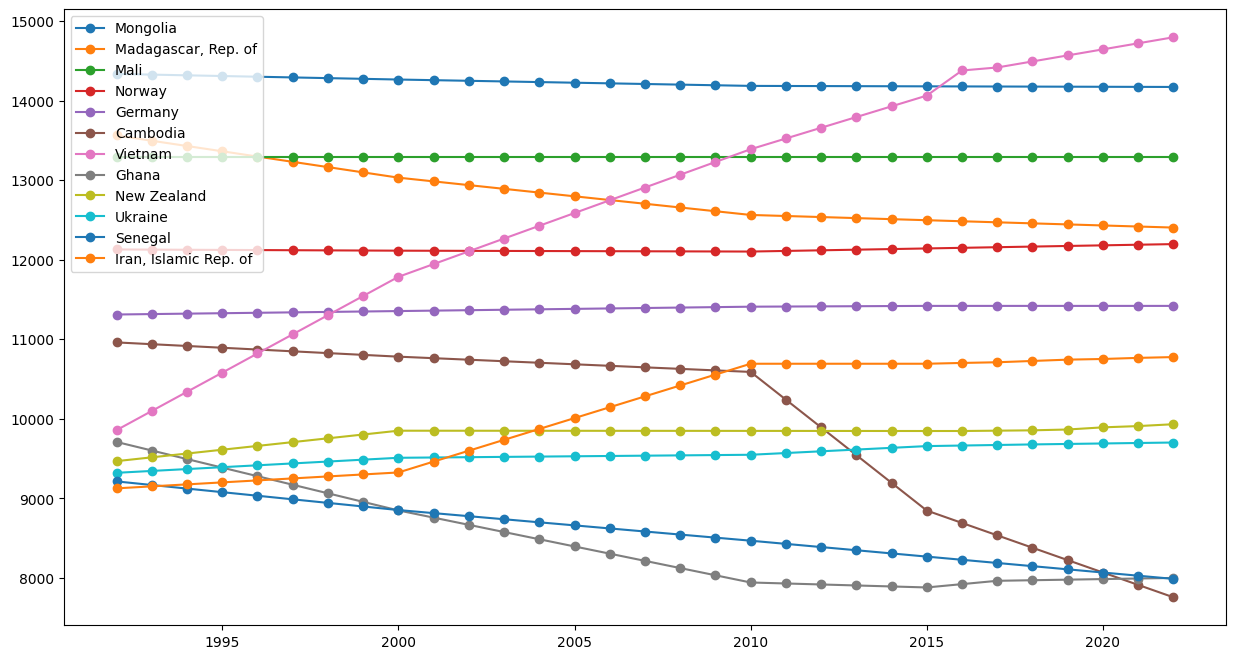

In [110]:
plt.figure(figsize=(15,8))
for country in countries :
    country_data = forest_areas_long[forest_areas_long['Country'] == country]
    plt.plot(country_data['Year'], country_data['Forest Areas'], label = country, marker='o')

plt.legend()

### 2. Loading and Cleaning Country GDP data

In [111]:
df_gdp = pd.read_csv("Data/Per Capita GDP of All Countries 1970 to 2022.csv")
df_gdp.head()

,Sr.No,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afghanistan,162.642176,166.224832,141.365323,149.744069,181.598776,194.669036,205.674097,232.778698,255.045622,284.755528,291.649801,311.853618,340.878874,341.602415,328.050456,316.003631,317.808147,279.721756,256.590769,313.140391,338.631986,310.846728,288.170791,190.263186,136.818121,197.108067,182.640637,169.561045,157.461704,141.204059,180.723154,183.889122,204.054245,216.328681,233.683369,265.246371,286.637149,386.025557,389.604153,435.693504,537.238236,612.773225,649.710978,631.060444,596.048898,554.004007,526.164709,534.020133,513.981256,512.910125,512.749930,378.082892,344.649112
1,2,Albania,974.554499,975.216820,976.521166,978.617771,981.265874,984.901966,989.749878,994.937066,1003.163054,821.218508,728.107125,740.369907,749.848952,746.583851,726.671599,732.854978,747.424762,734.537616,754.025635,895.924262,651.201284,483.676684,458.914225,515.173587,571.023495,728.532187,978.085686,683.726604,790.448796,1004.179887,1096.028688,1245.203150,1394.523697,1798.084592,2343.426765,2655.143784,2962.014554,3587.708620,4364.061410,4109.893153,4093.825900,4444.126505,4259.667181,4425.430822,4586.606188,3950.390255,4117.006970,4521.752217,5268.116608,5359.239078,5288.989573,6281.046775,6655.258391
2,3,Algeria,373.670080,380.125666,496.991248,624.193795,875.023948,989.243356,1075.725904,1225.090692,1495.734837,1827.570195,2254.727865,2287.414424,2254.731316,2354.798399,2469.340135,2614.487673,2749.815716,2727.605479,2419.476782,2223.606797,2419.907394,1781.785125,1835.838094,1858.825858,1515.220033,1473.820352,1615.900704,1630.764231,1606.668050,1599.251928,1776.362960,1764.583171,1796.672161,2117.048269,2624.793282,3131.328300,3500.134528,3971.803658,4946.563793,3898.478923,4495.921455,5473.446129,5610.733341,5519.777576,5516.229431,4197.417286,3967.200546,4134.936055,4171.795392,4021.983602,3354.157303,3700.320562,4273.922183
3,4,Andorra,5008.901637,5305.716707,6285.301526,7824.531307,9078.009005,10076.494834,9817.312977,10384.507961,11964.939169,15252.250397,15860.623323,13307.107321,12323.290533,10260.110198,9901.370028,10014.894298,13373.137597,16237.923737,18383.986675,19492.103211,24305.217277,25265.665752,26727.546303,21541.304501,21094.168558,23701.627070,24144.350367,23096.086818,23525.232130,23894.616282,21620.416388,22809.101548,24785.006079,31954.153531,37630.694912,39583.986001,43084.246225,50562.829253,53721.433995,49750.667238,48190.908728,51360.922656,44904.881276,44735.004774,45619.782548,38869.870777,39904.138181,40632.206416,42904.822583,41328.634079,37207.175636,42065.970756,42293.297081
4,5,Angola,631.514939,648.910896,644.659613,762.730111,827.378464,589.868220,547.946934,578.443953,623.627939,669.057554,858.684777,774.485563,747.158295,753.043195,768.048065,915.182866,828.130697,922.034059,961.012832,1081.090870,1155.728995,1323.873293,1471.337044,1032.955533,1029.616125,477.437343,606.657965,687.693514,560.803284,518.386877,744.620496,705.282288,872.657638,982.805590,1254.695488,1900.722637,2597.963585,3121.348735,4081.717497,3123.698754,3586.663902,4608.155096,5083.826781,5228.511165,5371.216648,4130.930080,3468.520268,4042.681382,3240.862207,2569.629757,1639.951023,2026.030952,3183.699796


In [112]:
cols_to_keep = [df_gdp.columns[0], df_gdp.columns[1]] + list(df_gdp.loc[:,'1991':'2022'])
df_gdp_specific = df_gdp.loc[:, cols_to_keep]
df_gdp_specific.head(10)

,Sr.No,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afghanistan,310.846728,288.170791,190.263186,136.818121,197.108067,182.640637,169.561045,157.461704,141.204059,180.723154,183.889122,204.054245,216.328681,233.683369,265.246371,286.637149,386.025557,389.604153,435.693504,537.238236,612.773225,649.710978,631.060444,596.048898,554.004007,526.164709,534.020133,513.981256,512.910125,512.749930,378.082892,344.649112
1,2,Albania,483.676684,458.914225,515.173587,571.023495,728.532187,978.085686,683.726604,790.448796,1004.179887,1096.028688,1245.203150,1394.523697,1798.084592,2343.426765,2655.143784,2962.014554,3587.708620,4364.061410,4109.893153,4093.825900,4444.126505,4259.667181,4425.430822,4586.606188,3950.390255,4117.006970,4521.752217,5268.116608,5359.239078,5288.989573,6281.046775,6655.258391
2,3,Algeria,1781.785125,1835.838094,1858.825858,1515.220033,1473.820352,1615.900704,1630.764231,1606.668050,1599.251928,1776.362960,1764.583171,1796.672161,2117.048269,2624.793282,3131.328300,3500.134528,3971.803658,4946.563793,3898.478923,4495.921455,5473.446129,5610.733341,5519.777576,5516.229431,4197.417286,3967.200546,4134.936055,4171.795392,4021.983602,3354.157303,3700.320562,4273.922183
3,4,Andorra,25265.665752,26727.546303,21541.304501,21094.168558,23701.627070,24144.350367,23096.086818,23525.232130,23894.616282,21620.416388,22809.101548,24785.006079,31954.153531,37630.694912,39583.986001,43084.246225,50562.829253,53721.433995,49750.667238,48190.908728,51360.922656,44904.881276,44735.004774,45619.782548,38869.870777,39904.138181,40632.206416,42904.822583,41328.634079,37207.175636,42065.970756,42293.297081
4,5,Angola,1323.873293,1471.337044,1032.955533,1029.616125,477.437343,606.657965,687.693514,560.803284,518.386877,744.620496,705.282288,872.657638,982.805590,1254.695488,1900.722637,2597.963585,3121.348735,4081.717497,3123.698754,3586.663902,4608.155096,5083.826781,5228.511165,5371.216648,4130.930080,3468.520268,4042.681382,3240.862207,2569.629757,1639.951023,2026.030952,3183.699796
5,6,Anguilla,9019.390825,9502.691114,10097.695834,10984.379839,10804.757259,11106.287735,12107.471926,13310.052306,13738.207735,13599.871827,13657.272077,13635.747309,14535.601505,16851.433098,18881.460135,22969.874540,28314.525001,27954.380146,21967.603321,20325.822002,21781.727951,20818.378050,20569.480211,22047.422883,22756.280768,21619.849507,18718.318718,21240.732202,24495.015171,16582.659014,19106.060927,28561.285003
6,7,Antigua and Barbuda,7569.969001,7721.763119,8129.144121,8788.013323,8440.034526,9079.481212,9556.832802,10029.477750,10379.160402,10443.501926,10152.419690,10396.134848,10758.838249,11380.088364,12708.077996,14203.917744,15879.692851,16457.104063,14530.598690,13404.516016,13117.146941,13686.476585,13350.149137,14004.811212,14861.882707,15862.651663,16110.312400,17514.355864,18187.779712,15303.278112,16740.348196,18880.028883
7,8,Argentina,6210.082556,7385.823249,7540.225857,8097.348546,8003.792851,8336.707754,8865.669983,8945.805214,8387.032495,8312.430527,7772.969216,2918.925923,3669.040649,4291.515837,5134.876718,5937.434933,7266.384194,9078.970897,8267.539947,10376.792178,12768.514643,13859.311731,14469.003850,13241.393385,14908.621297,12767.455354,14609.783370,11816.649537,10006.693111,8565.153126,10775.999836,13867.913268
8,9,Aruba,14378.751563,15277.872679,16745.449946,18657.272560,17961.488571,18207.527433,19609.829517,20688.006473,20782.619497,21026.167091,20911.192767,21375.269123,22050.589873,24105.524121,24978.215761,25832.919722,27665.311024,29011.616253,25740.770230,24452.594307,26043.167356,25611.159354,26514.863550,26940.258722,28419.243101,28449.728927,29329.092343,30918.483584,31902.757333,24008.127822,29127.759386,33300.838821
9,10,Australia,19090.461947,18682.182404,17996.277925,20360.364788,21780.254556,23919.690830,23754.311009,20999.430201,22740.697872,21565.365702,20326.276705,22404

In [113]:
gdp_growth = pd.DataFrame()

In [120]:
for index,row in df_gdp_specific.iterrows():
    
    new_row = pd.DataFrame()
    new_row['Sr.No'] = [row['Sr.No']]
    new_row['Country'] = [row['Country']] 
    
    previous_val = row['1991']
    blank_value = False
    
    for col in list(df_gdp_specific.loc[:,'1992':'2022']):
        if pd.isna(row[col]) :
            blank_value = True
            break
        val = (row[col] - previous_val) / (previous_val) * 100
        new_row[col] = [val]
        previous_val = row[col]
        
    if (blank_value) :
        continue

    gdp_growth = pd.concat([gdp_growth, new_row], ignore_index=True)

gdp_growth.head(10)

,Sr.No,Country,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afghanistan,-7.294893,-33.975548,-28.090071,44.065760,-7.339846,-7.161381,-7.135685,-10.324825,27.987224,1.751833,10.965914,6.015281,8.022370,13.506739,8.064494,34.673945,0.927036,11.829789,23.306460,14.059868,6.027965,-2.870589,-5.548049,-7.053933,-5.025108,1.492959,-3.752457,-0.208399,-0.031232,-26.263687,-8.842976
1,2,Albania,-5.119630,12.259232,10.840988,27.583575,34.254286,-30.095429,15.608899,27.039208,9.146648,13.610452,11.991662,28.938977,30.329061,13.301761,11.557595,21.123936,21.639238,-5.824122,-0.390941,8.556803,-4.150632,3.891469,3.642027,-13.871170,4.217728,9.831056,16.506088,1.729697,-1.310811,18.757027,5.957791
2,3,Algeria,3.033641,1.252167,-18.485100,-2.732255,9.640276,0.919829,-1.477601,-0.461584,11.074617,-0.663141,1.818503,17.831640,23.983629,19.298092,11.777948,13.475743,24.542002,-21.188140,15.325016,21.742477,2.508241,-1.621103,-0.064281,-23.907855,-5.484724,4.228057,0.891413,-3.591063,-16.604401,10.320424,15.501404
3,4,Andorra,5.786036,-19.404107,-2.075714,12.361040,1.867903,-4.341651,1.858087,1.570162,-9.517625,5.497975,8.662790,28.925341,17.764643,5.190686,8.842617,17.358045,6.246891,-7.391401,-3.135151,6.578033,-12.569948,-0.378303,1.977820,-14.796019,2.660846,1.824543,5.593140,-3.673686,-9.972404,13.058758,0.540404
4,5,Angola,11.138812,-29.794772,-0.323287,-53.629578,27.065462,13.357700,-18.451567,-7.563509,43.641849,-5.282988,23.731682,12.622127,27.664668,51.488760,36.682940,20.145977,30.767750,-23.470971,14.821056,28.480260,10.322389,2.845974,2.729371,-23.091352,-16.035367,16.553489,-19.833845,-20.711539,-36.179482,23.542162,57.139741
5,6,Anguilla,5.358458,6.261434,8.781053,-1.635255,2.790720,9.014571,9.932547,3.216782,-1.006943,0.422065,-0.157607,6.599229,15.932135,12.046614,21.653063,23.268087,-1.271944,-21.416239,-7.473648,7.162839,-4.422743,-1.195568,7.185124,3.215151,-4.993924,-13.420680,13.475641,15.320955,-32.301903,15.217113,49.488087
6,7,Antigua and Barbuda,2.005215,5.275751,8.105025,-3.959698,7.576352,5.257476,4.945623,3.486549,0.619911,-2.787209,2.400562,3.488829,5.774323,11.669414,11.770779,11.797978,3.636161,-11.706223,-7.749733,-2.143823,4.340347,-2.457371,4.903781,6.119836,6.733797,1.561282,8.715185,3.844982,-15.859559,9.390603,12.781578
7,8,Argentina,18.932771,2.090527,7.388674,-1.155387,4.159464,6.344977,0.903882,-6.246198,-0.889492,-6.489814,-62.447736,25.698313,16.965612,19.651818,15.629552,22.382549,24.944823,-8.937477,25.512453,23.048765,8.542866,4.399151,-8.484416,12.591031,-14.361931,14.429876,-19.118243,-15.317002,-14.405758,25.812110,28.692590
8,9,Aruba,6.253124,9.605901,11.416968,-3.729291,1.369813,7.701771,5.498145,0.457333,1.171881,-0.546815,2.219273,3.159356,9.319180,3.620297,3.421797,7.093241,4.866402,-11.274263,-5.004419,6.504721,-1.658815,3.528556,1.604365,5.489867,0.107272,3.090938,5.419163,3.183448,-24.745916,21.324576,14.326812
9,10,Australia,-2.138657,-3.671437,13.136532,6.973793,9.822825,-0.691396,-11.597393,8.291976,-5.168409,-5.745736,10.222247,26.977574,20.070320,10.787335,5.879756,18.263797,5.091019,-5.688231,25.837036,17.167652,1.142598,-4.592323,-6.611558,-16.155775,3.312652,6.355818,1.457514,-6.720786,2.929567,20.740046,0.370460


In [125]:
country_list = list(gdp_growth['Country'])
gdp_growth_long = gdp_growth.melt(
                    id_vars = ['Country'],
                    value_vars = [col for col in gdp_growth.columns if (col.startswith('1') or col.startswith('2'))],
                    var_name = 'Year',
                    value_name = 'Gdp Growth')
gdp_growth_long['Year'] = gdp_growth_long['Year'].astype(int)
gdp_growth_long.head()

,Country,Year,Gdp Growth
0,Afghanistan,1992,-7.294893
1,Albania,1992,-5.119630
2,Algeria,1992,3.033641
3,Andorra,1992,5.786036
4,Angola,1992,11.138812


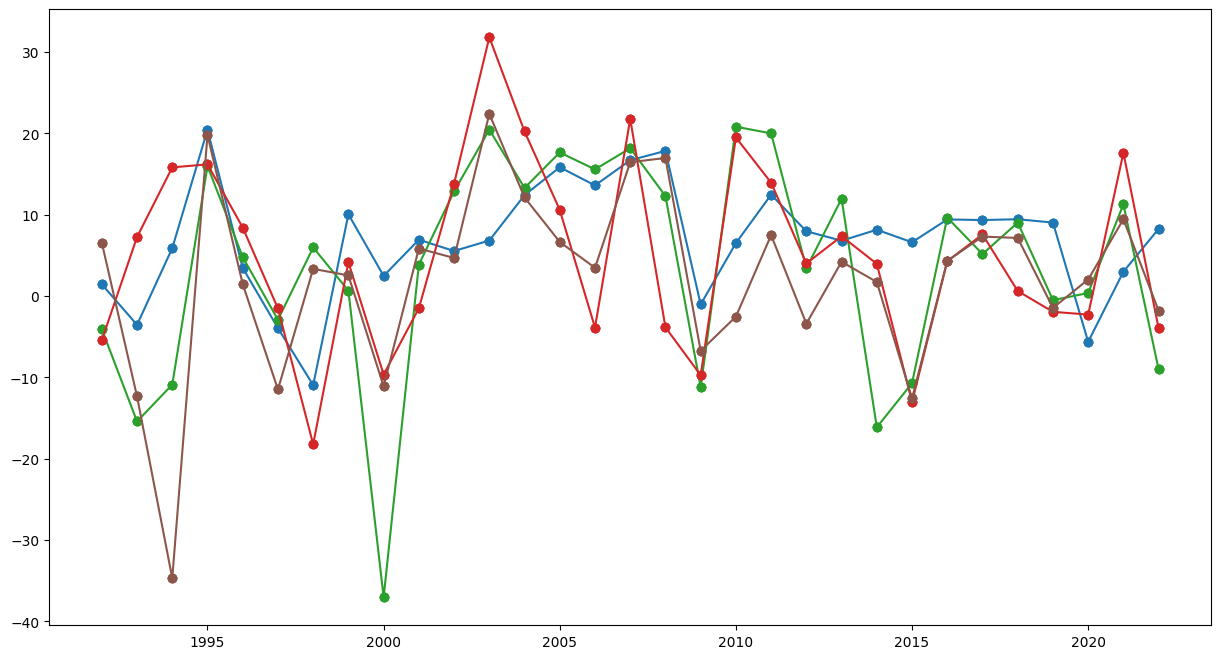

In [130]:
plt.figure(figsize=(15,8))
for country in countries :
    country_data = gdp_growth_long[gdp_growth_long['Country'] == country]
    plt.plot(country_data['Year'], country_data['Gdp Growth'], label = country, marker='o')
